In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime

from IPython.display import display

In [57]:
# dataset = pd.read_csv(r"D:\Usep Syaikal Arifin\Computer Programming\Python\MyProjects\Matplotlib VS Plotly\Dataset\File CSV\retail_raw_reduced.csv")
dataset = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv")

print("Shape of dataset = %d Baris & %d Kolom"%dataset.shape)
print("Informasi dataset : ")
display(dataset.info())
print("Mengecek Missing Value : ")
display(dataset.isnull().sum())
print("Mengecek Statistika Dasar : ")
display(dataset.describe())
display(dataset.head())

Shape of dataset = 5000 Baris & 9 Kolom
Informasi dataset : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   order_id     5000 non-null   int64 
 1   order_date   5000 non-null   object
 2   customer_id  5000 non-null   int64 
 3   city         5000 non-null   object
 4   province     5000 non-null   object
 5   product_id   5000 non-null   object
 6   brand        5000 non-null   object
 7   quantity     5000 non-null   int64 
 8   item_price   5000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 351.7+ KB


None

Mengecek Missing Value : 


order_id       0
order_date     0
customer_id    0
city           0
province       0
product_id     0
brand          0
quantity       0
item_price     0
dtype: int64

Mengecek Statistika Dasar : 


,order_id,customer_id,quantity,item_price
count,5.000000e+03,5000.000000,5000.000000,5.000000e+03
mean,1.707214e+06,15474.832600,11.407200,9.345866e+05
std,2.152582e+04,1650.211651,29.404536,1.031427e+06
min,1.666774e+06,12391.000000,1.000000,2.600000e+04
25%,1.688852e+06,14096.000000,2.000000,4.500000e+05
50%,1.708448e+06,15492.500000,5.000000,6.040000e+05
75%,1.725623e+06,16916.000000,12.000000,1.045000e+06
max,1.742998e+06,18287.000000,720.000000,2.976200e+07


,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000


In [58]:
dataset["order_month"] = dataset["order_date"].apply(lambda x : datetime.datetime.strptime(x, "%Y-%m-%d").strftime("%Y-%d"))
display(dataset.head())

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,order_month
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000,2019-17
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000,2019-24
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000,2019-03
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000,2019-19
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000,2019-16


In [59]:
print("Tipe Dataset : ")
display(dataset.dtypes)

Tipe Dataset : 


order_id        int64
order_date     object
customer_id     int64
city           object
province       object
product_id     object
brand          object
quantity        int64
item_price      int64
order_month    object
dtype: object

In [60]:
dataset["gmv"] = dataset["quantity"] * dataset["item_price"]
display(dataset.head())

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,order_month,gmv
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000,2019-17,7400000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000,2019-24,1208000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000,2019-03,8360000
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000,2019-19,820000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000,2019-16,8950000


In [61]:
monthly_amount = dataset.groupby(["order_month"])["gmv"].sum().reset_index()
display(monthly_amount.head())

,order_month,gmv
0,2019-01,1152291000
1,2019-02,866752000
2,2019-03,823028000
3,2019-04,1274602000
4,2019-05,1173029000


## Lineplot -> Pointlpot

In [62]:
lineplot_x = monthly_amount["order_month"].to_list()

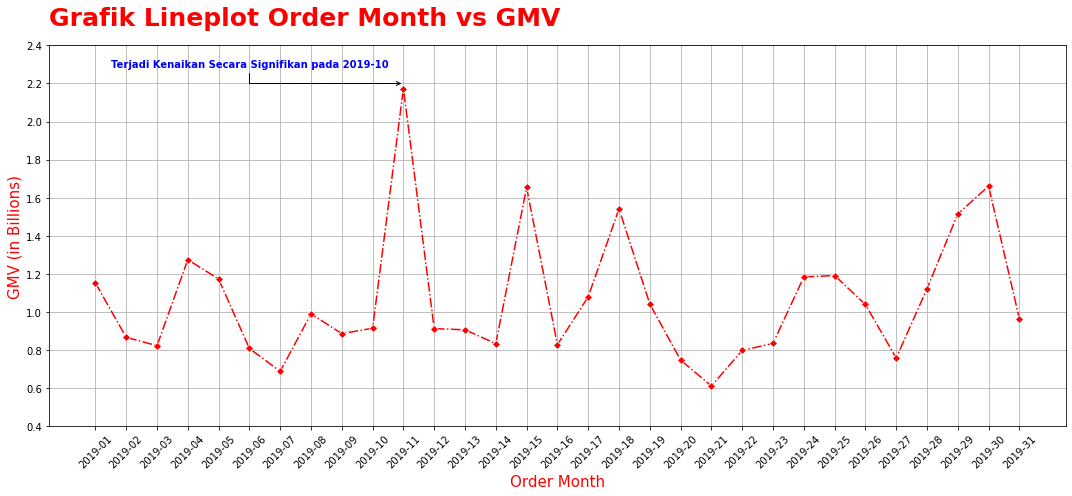

In [108]:
fig, axs = plt.subplots(1, 1, figsize=(15, 7))
sns.lineplot(data=monthly_amount, x="order_month", y="gmv", marker="D", linestyle="-.", color="red", ax=axs)
axs.set_title("Grafik Lineplot Order Month vs GMV", fontsize=25, fontweight="bold", pad=20, loc="left", color="red")
axs.set_xticks(axs.get_xticks())
axs.set_xticklabels(lineplot_x, rotation=45)
axs.set_xlabel("Order Month", fontsize=15, color="red")
axs.set_yticks(axs.get_yticks())
axs.set_ylabel("GMV (in Billions)", fontsize=15, color="red")
axs.set_yticklabels(axs.get_yticks()/1000000000)
axs.annotate(
             "Terjadi Kenaikan Secara Signifikan pada 2019-10",
             xy=(10, 2200000000),
             ha="center",
             va="center",
             xytext=(5, 2300000000),
             color="blue",
             weight="bold",
             arrowprops=dict(
                 arrowstyle="->",
                 connectionstyle="angle"
             )
            )
axs.grid()
plt.tight_layout()
plt.show()

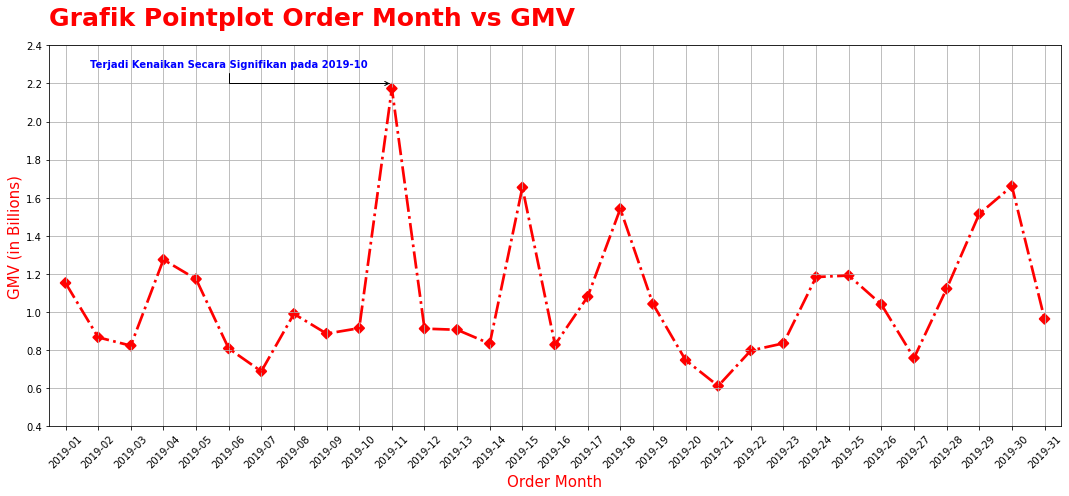

In [115]:
fig, axs = plt.subplots(1, 1, figsize=(15, 7))
sns.pointplot(data=monthly_amount, x="order_month", y="gmv", markers="D", linestyles="-.", color="red", ax=axs)
axs.set_title("Grafik Pointplot Order Month vs GMV", fontsize=25, fontweight="bold", loc="left", pad=20, color="red")
axs.set_xticks(axs.get_xticks())
axs.set_xticklabels(axs.get_xticklabels(), rotation=45)
axs.set_xlabel("Order Month", fontsize=15, color="red")
axs.set_yticks(axs.get_yticks())
axs.set_yticklabels(axs.get_yticks()/1000000000)
axs.set_ylabel("GMV (in Billions)", fontsize=15, color="red")
axs.annotate(
             "Terjadi Kenaikan Secara Signifikan pada 2019-10",
             xy=(10, 2200000000),
             ha="center",
             va="center",
             xytext=(5, 2300000000),
             color="blue",
             weight="bold",
             arrowprops=dict(
                 arrowstyle="->",
                 connectionstyle="angle"
             )
            )
axs.grid()
plt.tight_layout()
plt.show()